# Playing with data augmentation

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate
torch.cuda.set_device(0)

In [3]:
path = Path('./data/images')
path.ls()

[PosixPath('data/images/models'),
 PosixPath('data/images/train'),
 PosixPath('data/images/valid')]

## Data augmentation
Using some max values for data augmentation


In [4]:
tfms = get_transforms(max_rotate=20, max_zoom=1.3, max_lighting=0.4, max_warp=0.4,
                      p_affine=1., p_lighting=1.)

In [5]:
src = ImageList.from_folder(path).split_by_folder(train='train', valid='valid')

In [6]:
def get_data(size, bs, padding_mode='reflection'):
    return (src.label_from_folder()
           .transform(tfms, size=size, padding_mode=padding_mode)
           .databunch(bs=bs).normalize(imagenet_stats))

In [7]:
data = get_data(299, 40, 'reflection')

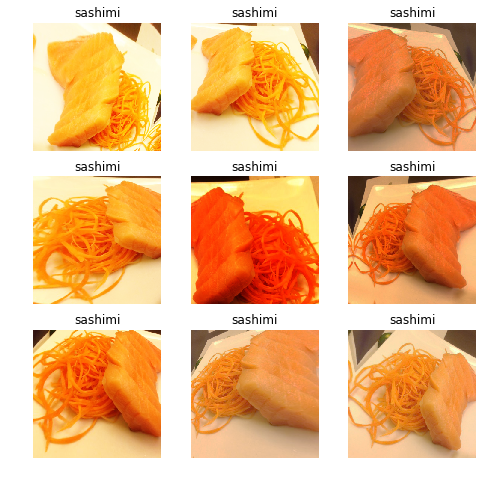

In [8]:
def _plot(i,j,ax):
    x,y = data.train_ds[3]
    x.show(ax, y=y)

plot_multi(_plot, 3, 3, figsize=(8,8))

## Training resnet50

In [8]:
learn = create_cnn(data, models.resnet50, metrics=error_rate)

In [11]:
learn.fit_one_cycle(6)

epoch,train_loss,valid_loss,error_rate,time
1,2.055606,1.246293,0.332634,12:01
2,1.718531,1.028021,0.282653,11:59
3,1.493782,0.872262,0.242772,11:59
4,1.408669,0.777997,0.216040,12:01
5,1.244899,0.725004,0.201941,12:02
6,1.174017,0.712106,0.197505,12:01


In [12]:
learn.save('stage-1-50-aug-food-101')

In [9]:
learn.load('stage-1-50-aug-food-101');

In [12]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


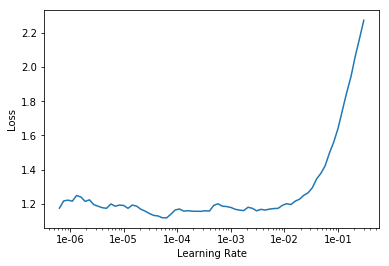

In [13]:
learn.recorder.plot()

In [10]:
learn.unfreeze()

In [12]:
learn.fit_one_cycle(8, max_lr=slice(1e-05, 1e-04))

epoch,train_loss,valid_loss,error_rate,time
1,1.159449,0.688099,0.191604,15:49
2,1.109080,0.636415,0.176832,15:45
3,1.022928,0.579106,0.161901,15:46
4,0.934192,0.539048,0.151129,15:45
5,0.795289,0.493562,0.137584,15:45
6,0.715815,0.467330,0.131762,15:46
7,0.671901,0.452193,0.127881,15:46
8,0.645910,0.449875,0.126931,15:46


In [13]:
learn.save('stage-2-50-aug-food-101')